In [91]:
import pandas as pd
import missingno as msn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet,LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import mean_squared_error



# ***Getting know data***

In [47]:
df=pd.read_csv("Hitters.csv")
data=df.copy()

In [48]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,322.0,380.928571,153.404981,16.0,255.25,379.5,512.00,687.0
Hits,322.0,101.024845,46.454741,1.0,64.00,96.0,137.00,238.0
HmRun,322.0,10.770186,8.709037,0.0,4.00,8.0,16.00,40.0
Runs,322.0,50.909938,26.024095,0.0,30.25,48.0,69.00,130.0
RBI,322.0,48.027950,26.166895,0.0,28.00,44.0,64.75,121.0
Walks,322.0,38.742236,21.639327,0.0,22.00,35.0,53.00,105.0
Years,322.0,7.444099,4.926087,1.0,4.00,6.0,11.00,24.0
CAtBat,322.0,2648.683230,2324.205870,19.0,816.75,1928.0,3924.25,14053.0
CHits,322.0,717.571429,654.472627,4.0,209.00,508.0,1059.25,4256.0
CHmRun,322.0,69.490683,86.266061,0.0,14.00,37.5,90.00,548.0


In [51]:
df.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')

In [52]:
df.dtypes

AtBat          int64
Hits           int64
HmRun          int64
Runs           int64
RBI            int64
Walks          int64
Years          int64
CAtBat         int64
CHits          int64
CHmRun         int64
CRuns          int64
CRBI           int64
CWalks         int64
League        object
Division      object
PutOuts        int64
Assists        int64
Errors         int64
Salary       float64
NewLeague     object
dtype: object

In [53]:
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

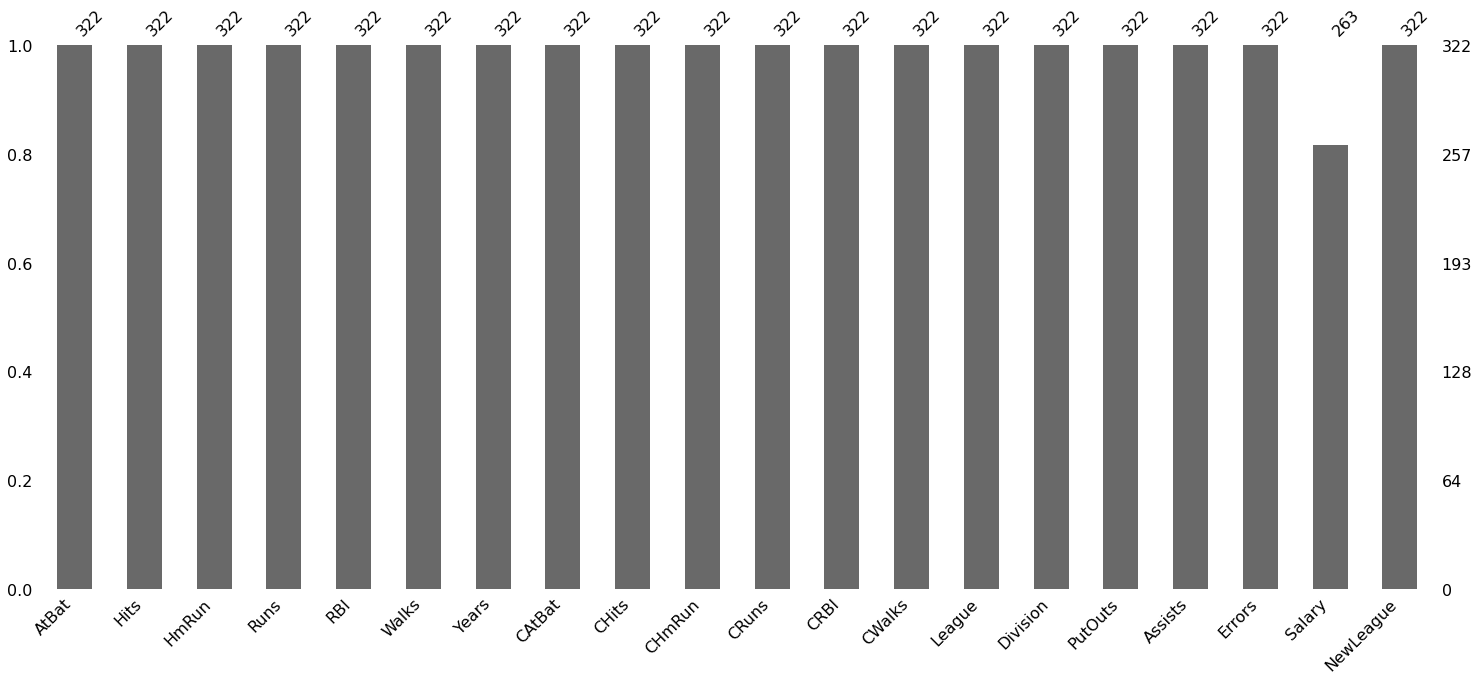

In [54]:
msn.bar(df)

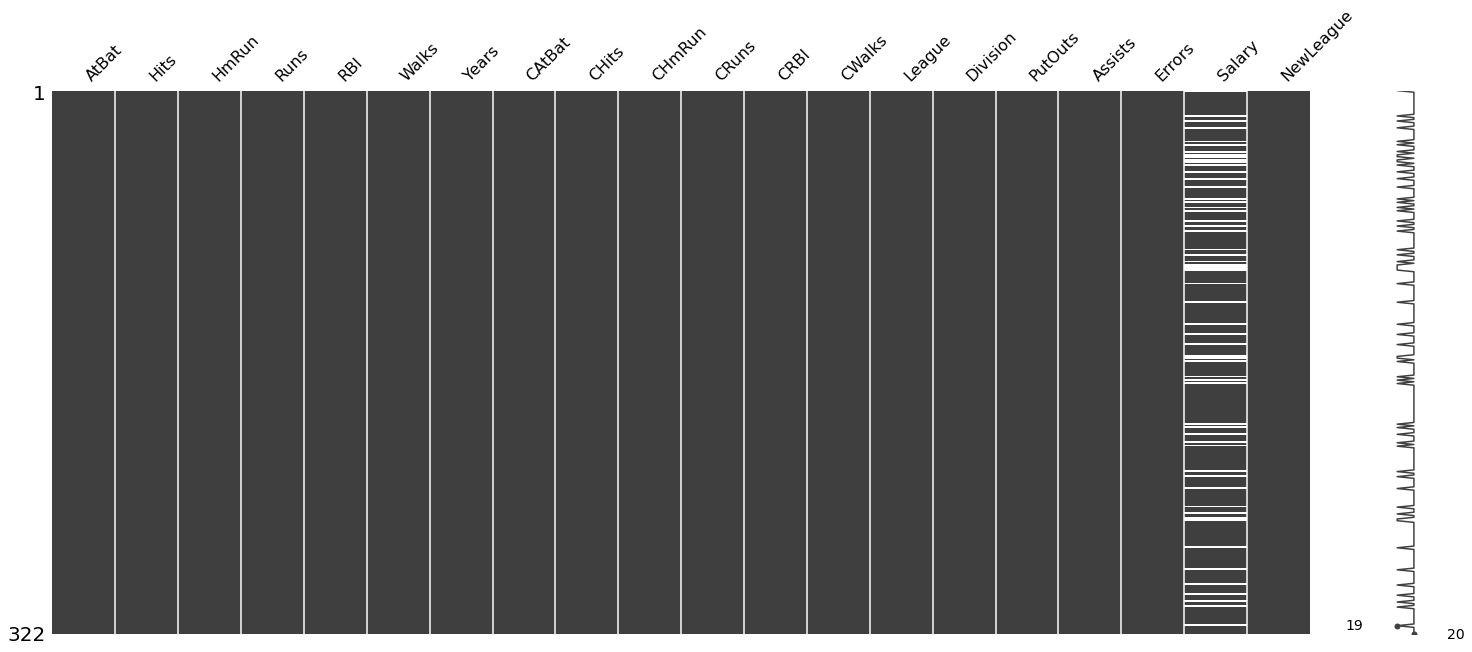

In [55]:
msn.matrix(df)

In [56]:
df.shape

(322, 20)

# **Working on null values**

In [57]:
df.isnull().sum()/df.shape[0]*100

AtBat         0.000000
Hits          0.000000
HmRun         0.000000
Runs          0.000000
RBI           0.000000
Walks         0.000000
Years         0.000000
CAtBat        0.000000
CHits         0.000000
CHmRun        0.000000
CRuns         0.000000
CRBI          0.000000
CWalks        0.000000
League        0.000000
Division      0.000000
PutOuts       0.000000
Assists       0.000000
Errors        0.000000
Salary       18.322981
NewLeague     0.000000
dtype: float64

In [58]:
df[df["CAtBat"]>7000]

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
16,568,158,20,89,75,73,15,8068,2273,177,1045,993,732,N,W,105,290,10,775.000,N
24,629,168,18,73,102,40,18,8424,2464,164,1008,1072,402,A,E,1067,157,14,776.667,A
41,216,54,0,21,18,15,18,7318,1926,46,796,627,483,N,W,103,84,5,NaN,N
48,542,140,12,46,75,41,16,7099,2130,235,987,1089,431,A,E,697,61,9,NaN,A
65,585,139,31,93,94,62,17,7546,1982,315,1141,1179,727,A,E,0,0,0,950.000,A
70,311,81,3,42,30,26,17,8247,2198,100,950,909,690,N,W,153,223,10,320.000,N
73,507,122,29,78,85,91,18,7761,1947,347,1175,1152,1380,A,E,808,108,2,535.000,A
96,565,148,24,90,104,77,14,7287,2083,305,1135,1234,791,A,E,292,9,5,1861.460,A
114,284,64,14,30,42,24,18,7023,1925,348,986,1239,666,N,E,96,4,4,NaN,N
121,354,77,16,36,55,41,20,8716,2172,384,1172,1267,1057,N,W,83,174,16,200.000,N


In [59]:
df[df["CHits"]>3000]

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
236,237,52,0,15,25,30,24,14053,4256,160,2165,1314,1566,N,W,523,43,6,750.0,N


In [60]:
df=df[df["CHits"]<3000]

In [61]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [62]:
df.shape

(321, 20)

In [63]:
df['Salary'].mean()

535.1088053435113

In [64]:
df['Salary'].median()

422.5

In [65]:
df['Salary'].mode()

0    750.0
dtype: float64

In [66]:
df["Salary"].fillna(df['Salary'].median(),inplace=True)

In [67]:
df.isnull().sum()

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

# **Getting numeric and categorical data and their visualisation**

In [74]:
df._get_numeric_data()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,422.5
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3,700.0
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20,875.0
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7,385.0
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12,960.0


In [75]:
numeric_cols=df._get_numeric_data().columns
cat_cols=set(df.columns)-set(numeric_cols)

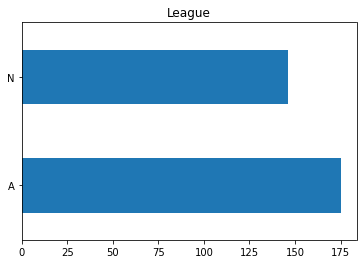

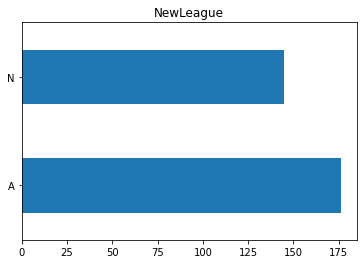

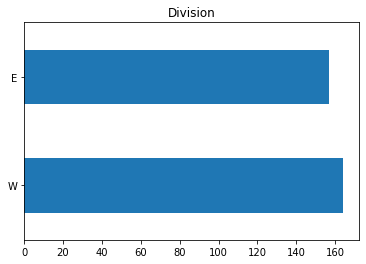

In [76]:
for col in  cat_cols:
    plt.title(col)
    df[col].value_counts().plot.barh()
    plt.show()

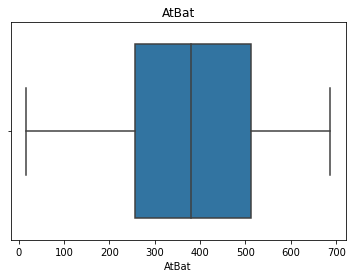

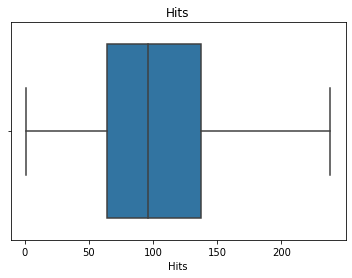

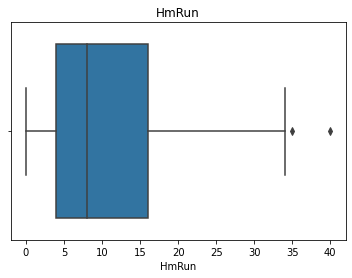

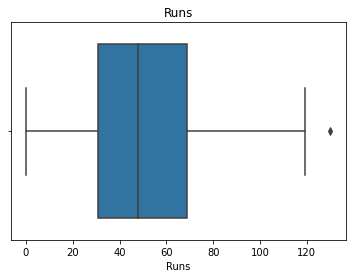

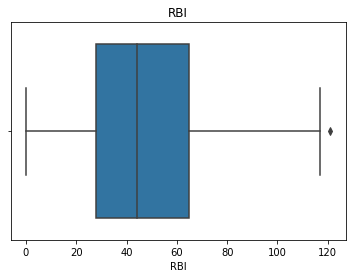

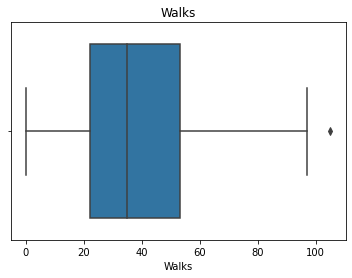

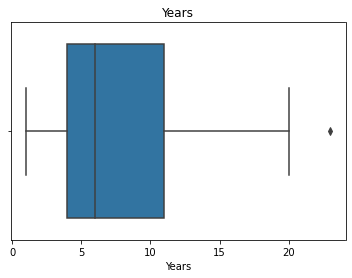

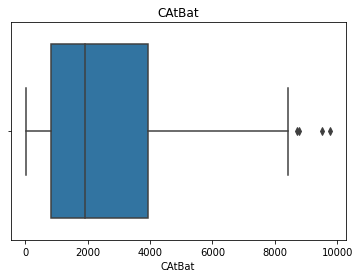

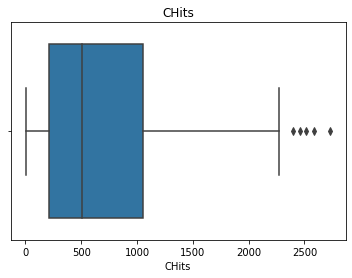

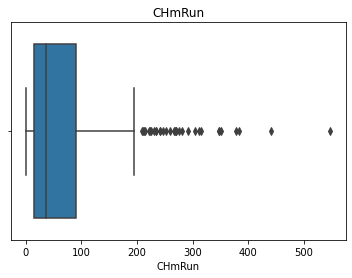

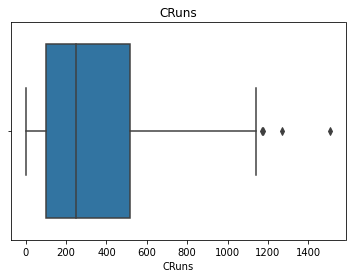

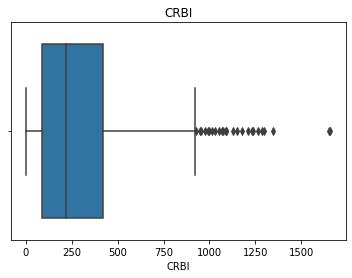

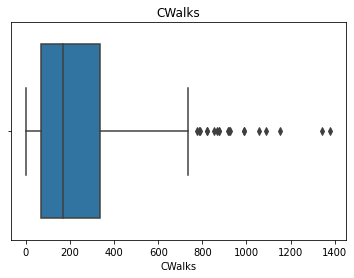

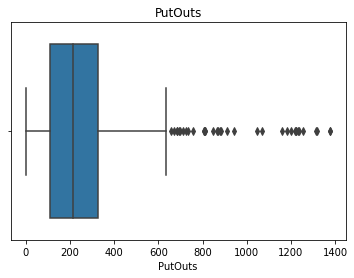

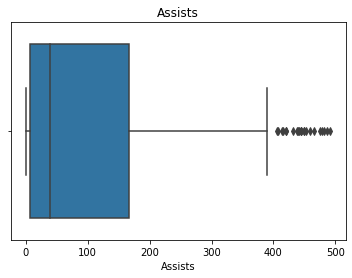

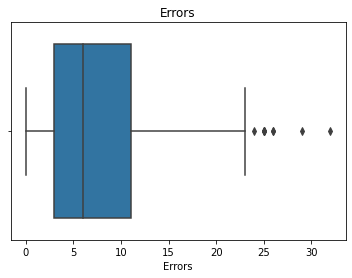

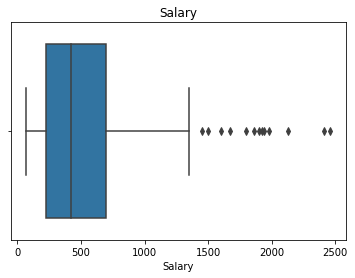

In [77]:
for col in numeric_cols:
  plt.title(col)
  sns.boxplot(df[col])
  plt.show()

# **Outliers**

In [78]:
def outliers(df,col):
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  df.loc[(df[col]<lower_bound), col ]=lower_bound
  df.loc[(df[col]>upper_bound), col ]=upper_bound
  return df


In [79]:
for col in numeric_cols:
    df=outliers(df, col)

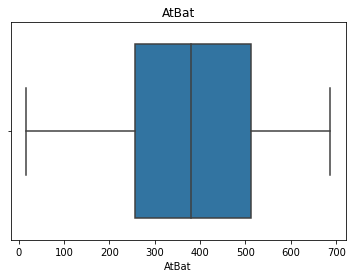

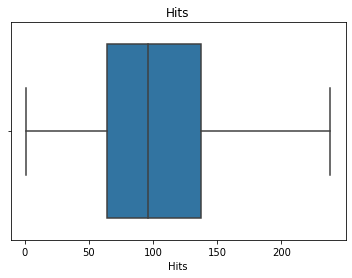

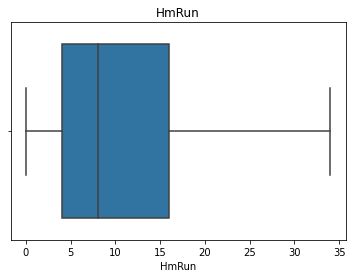

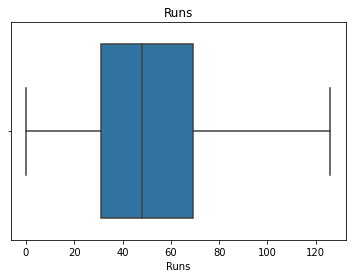

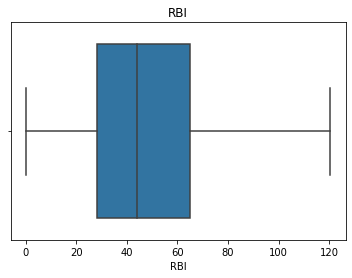

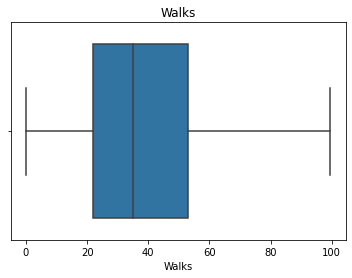

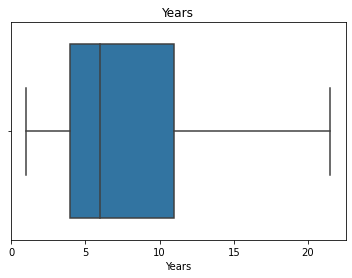

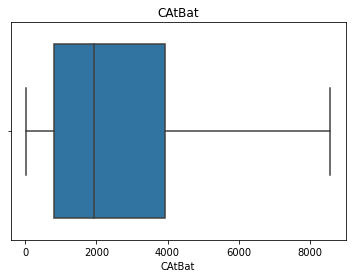

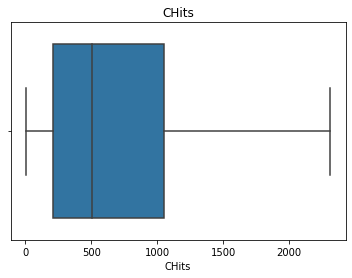

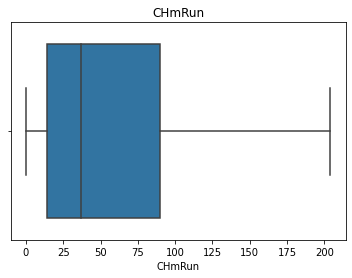

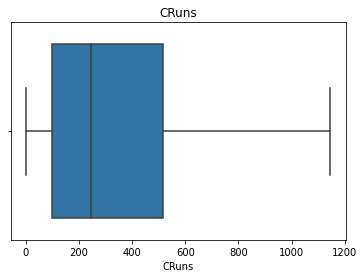

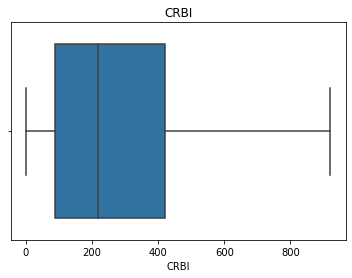

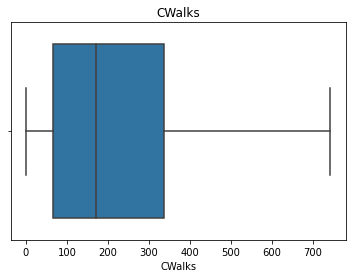

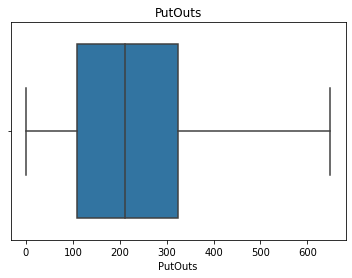

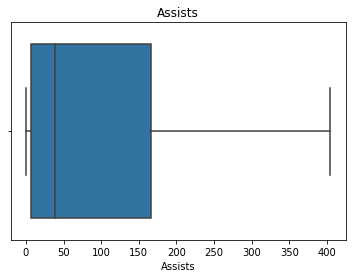

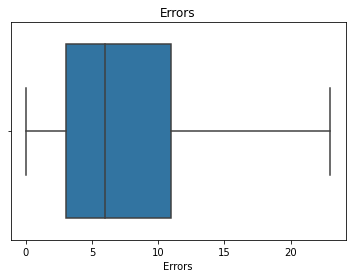

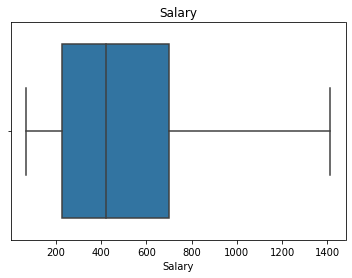

In [80]:
for col in numeric_cols:
    plt.title(col)
    sns.boxplot(df[col])
    plt.show()

In [81]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66.0,1,30,29.0,14.0,1.0,293,66,1,30,29.0,14,A,E,446,33.0,20,422.5,A
1,315,81.0,7,24,38.0,39.0,14.0,3449,835,69,321,414.0,375,N,W,632,43.0,10,475.0,N
2,479,130.0,18,66,72.0,76.0,3.0,1624,457,63,224,266.0,263,A,W,649,82.0,14,480.0,A
3,496,141.0,20,65,78.0,37.0,11.0,5628,1575,204,828,838.0,354,N,E,200,11.0,3,500.0,N
4,321,87.0,10,39,42.0,30.0,2.0,396,101,12,48,46.0,33,N,E,649,40.0,4,91.5,N


## **Standart Scaling**

In [84]:
df=pd.get_dummies(df, drop_first=True)
sc=StandardScaler()
df=pd.DataFrame(sc.fit_transform(df), columns=df.columns)

# **Machine Learning**

In [85]:
X=df.drop('Salary', axis=1)
Y=df[['Salary']]

In [86]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.20)

In [87]:
lr=LinearRegression()
lr.fit(X_train, Y_train)
Y_pred=lr.predict(X_test)
print(np.sqrt(mean_squared_error(Y_test, Y_pred)))

0.7953518721726321


In [88]:
lasso=Lasso()
lasso.fit(X_train, Y_train)
Y_pred=lasso.predict(X_test)
print(np.sqrt(mean_squared_error(Y_test, Y_pred)))

0.9872093938697063


In [89]:
ridge=Ridge()
ridge.fit(X_train, Y_train)
Y_pred=ridge.predict(X_test)
print(np.sqrt(mean_squared_error(Y_test, Y_pred)))

0.7739005879184709


In [90]:
elas=ElasticNet()
elas.fit(X_train, Y_train)
Y_pred=elas.predict(X_test)
print(np.sqrt(mean_squared_error(Y_test, Y_pred)))

0.9616019704340201


# **Model Tuning**

In [92]:
alphas=[0.1, 0.01, 1, 0.001, 0.0001]

In [94]:
model_cv=LassoCV(alphas=alphas, cv=10)
model_cv.fit(X_train, Y_train)
print(model_cv.alpha_)

0.001


In [95]:
lasso=Lasso(model_cv.alpha_)
lasso.fit(X_train, Y_train)
Y_pred=lasso.predict(X_test)
print(np.sqrt(mean_squared_error(Y_test, Y_pred)))

0.7881165929779838


In [96]:
alphas=[0.1, 0.01, 1, 0.001, 0.0001, 10, 100, ]
model_cv=RidgeCV(alphas=alphas, cv=10)
model_cv.fit(X_train, Y_train)
print(model_cv.alpha_)

0.1


In [97]:
ridge=Ridge(model_cv.alpha_)
ridge.fit(X_train, Y_train)
Y_pred=ridge.predict(X_test)
print(np.sqrt(mean_squared_error(Y_test, Y_pred)))

0.7900986354656316


# **Modelling**

In [99]:
def model_qur(algo, X, Y, test_size=0.20):
    X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=test_size, random_state=42)
    m=algo
    m.fit(X_train, Y_train)
    Y_train_pre=m.predict(X_train)
    Y_test_pre=m.predict(X_test)
    test_error=np.sqrt(mean_squared_error(Y_test, Y_test_pre))
    train_error=np.sqrt(mean_squared_error(Y_train, Y_train_pre))
    return train_error, test_error

In [100]:
cv={'model': [], 'train_error':[], 'test_error':[]}
models=[LinearRegression(), Lasso(), Ridge(), ElasticNet()]

for model in models:
    res=model_qur(model, X, Y)
    cv['model'].append(type(model).__name__)
    cv['train_error'].append(res[0])
    cv['test_error'].append(res[0])
    
res=pd.DataFrame(cv)

In [101]:
res

,model,train_error,test_error
0,LinearRegression,0.702660,0.702660
1,Lasso,0.990320,0.990320
2,Ridge,0.712631,0.712631
3,ElasticNet,0.969519,0.969519


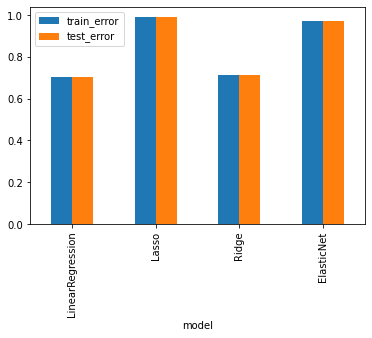

In [102]:
res.plot(x="model", y=["train_error", "test_error"], kind="bar")
plt.show()

In [103]:
def model_tuning(algo, algo_cv, X, Y, alphas, test_size=0.20, cv=10):
    X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=test_size, random_state=42)
    m_cv=algo_cv(alphas=alphas, cv=cv)
    m_cv.fit(X_train, Y_train)
    print(m_cv)
    m=algo(m_cv.alpha_)
    m.fit(X_train, Y_train)
    Y_train_pre=m.predict(X_train)
    Y_test_pre=m.predict(X_test)
    test_error=np.sqrt(mean_squared_error(Y_test, Y_test_pre))
    train_error=np.sqrt(mean_squared_error(Y_train, Y_train_pre))
    return train_error, test_error

In [104]:
cv={'model': [], 'train_error':[], 'test_error':[]}
alphas=[0, 0.1, 0.01, 0.001, 0.0001, 1, 10, 100, 1000]
models={Lasso: LassoCV, Ridge: RidgeCV, ElasticNet: ElasticNetCV}
for model in models:
    res=model_tuning(model, models[model], X, Y, alphas)
    cv['model'].append(type(models[model]()).__name__)
    cv['train_error'].append(res[0])
    cv['test_error'].append(res[1])
    
cv=pd.DataFrame(cv)

LassoCV(alphas=[0, 0.1, 0.01, 0.001, 0.0001, 1, 10, 100, 1000], cv=10)
RidgeCV(alphas=array([0.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e+00, 1.e+01, 1.e+02,
       1.e+03]),
        cv=10)
ElasticNetCV(alphas=[0, 0.1, 0.01, 0.001, 0.0001, 1, 10, 100, 1000], cv=10)


In [105]:
cv

,model,train_error,test_error
0,LassoCV,0.703329,0.796973
1,RidgeCV,0.760363,0.738254
2,ElasticNetCV,0.704184,0.788779
